# Արդյո՞ք հիվանդը ունի դիաբետ

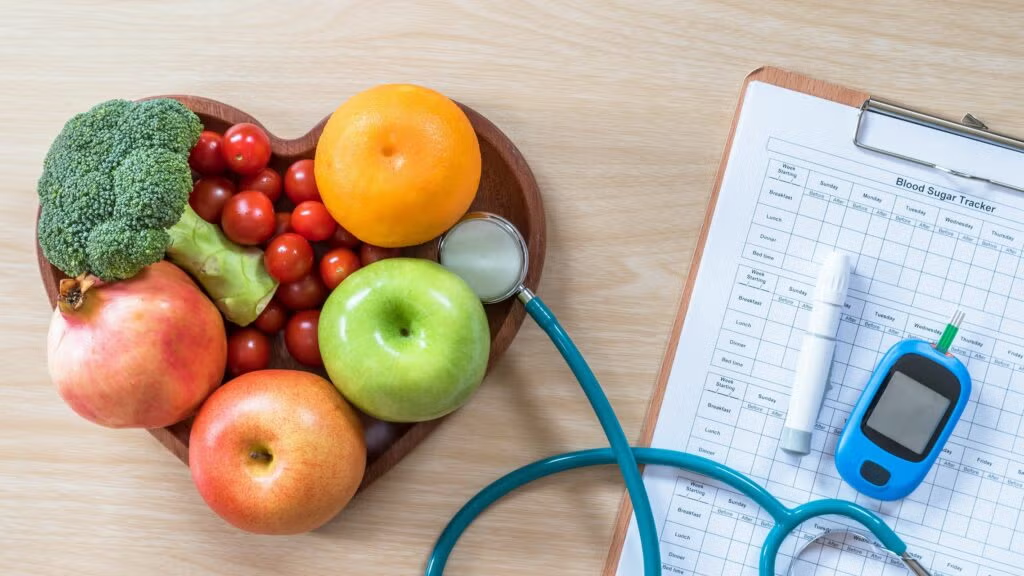

# Անհրաշեշտ գրադարանների ներմուծում և տվյալների բազայի բեռնում

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Տվյալների ներբեռնում
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)
# Տվյալների առաջին 5 տողը դիտարկելու համար
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Մասշտաբավորում և նորմալիզացում

In [ ]:
# Բաց թողնված արժեքների ստուգում 0-ները բաց թողնված արժեքներ են որոշ դաշտերում
print((data == 0).sum())

# normalizacum
X = data[[col for col in data.columns if col != "Outcome"]]
y = data["Outcome"]

# Բաց թողնված արժեքների փոխարինում միջինով
X["Glucose"].replace(0, X["Glucose"].mean(), inplace=True)
X["BloodPressure"].replace(0, X["BloodPressure"].mean(), inplace=True)
X["SkinThickness"].replace(0, X["SkinThickness"].mean(), inplace=True)
X["Insulin"].replace(0, X["Insulin"].mean(), inplace=True)
X["BMI"].replace(0, X["BMI"].mean(), inplace=True)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


<ipython-input-2-5b77d5f75438>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Glucose"].replace(0, X["Glucose"].mean(), inplace=True)
<ipython-input-2-5b77d5f75438>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Glucose"].replace(0, X["Glucose"].mean(), inplace=True)
<ipython-input-2-5b77d5f75438>:10: FutureWarning: A value is trying

In [ ]:
# Մասշտաբավորում
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Տվյալների բաժանում
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# k-NN մոդել

In [ ]:

# k-NN մոդել
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Precision:", precision_score(y_test, y_pred_knn))
print("k-NN Recall:", recall_score(y_test, y_pred_knn))
print("k-NN F1-Score:", f1_score(y_test, y_pred_knn))



k-NN Accuracy: 0.7662337662337663
k-NN Precision: 0.6610169491525424
k-NN Recall: 0.7090909090909091
k-NN F1-Score: 0.6842105263157895


# Decision Tree

In [ ]:
# Որոշման ծառ
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7207792207792207
Decision Tree Precision: 0.59375
Decision Tree Recall: 0.6909090909090909
Decision Tree F1-Score: 0.6386554621848739
